In [54]:
import pandas as pd
import numpy as np
import math

In [2]:
customer_df = pd.read_csv('Customer Data Cleaned.csv')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Date,Time,Weekday,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01,8,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01,8,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December


Objectives: 
1. Identify customer segments according to the value of purchasing
2. Identify customer segments according to the frequency of purchasing
3. Identifying the weekday having maximum sales
4. Identifying the hour of day having maximum sales

# Customer segmentation according to the value of total purchases

In [226]:
group_value_df = customer_df.groupby(by='CustomerID').sum()
group_value_df

,InvoiceNo,Quantity,UnitPrice,Value,Time
CustomerID,,,,,
12346.0,541431,74215,1.04,77183.60,10
12347.0,101296926,2458,481.21,4310.00,2219
12348.0,14671242,2332,18.71,1437.24,420
12349.0,41587848,630,305.10,1457.55,648
12350.0,8688592,196,25.30,294.40,256
...,...,...,...,...,...
18280.0,5457120,45,47.65,180.60,90
18281.0,3895248,54,39.36,80.82,70
18282.0,6838540,103,62.39,178.05,146


In [227]:
# let us observe the behaviour of high spenders to find any errors
topID_value = group_value_df.loc[group_value_df.Value > 100000].index.tolist()
topID_value

[12415.0, 14156.0, 14646.0, 14911.0, 16446.0, 17450.0, 18102.0]

In [228]:
for customer in topID_value:
    print('Customer ID : '+str(customer))
    print(len(customer_df.loc[customer_df.CustomerID == customer]))

Customer ID : 12415.0
715
Customer ID : 14156.0
1400
Customer ID : 14646.0
2064
Customer ID : 14911.0
5675
Customer ID : 16446.0
3
Customer ID : 17450.0
337
Customer ID : 18102.0
431


In [229]:
#customer 16446.0 has only provided 3 transactions let's investigate
customer_df.loc[customer_df.CustomerID == 16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Date,Time,Weekday,Month
133196,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446.0,United Kingdom,1.65,2011-05-18,9,Wednesday,May
133197,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446.0,United Kingdom,1.25,2011-05-18,9,Wednesday,May
395791,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.60,2011-12-09,9,Friday,December


In [230]:
# let's observe total value generated by top spenders as a percentage of all

group_value_df.loc[group_value_df.Value > 100000].Value.sum()*100/customer_df.Value.sum()

14.65146550229118

In [231]:
# let's group customers belongs 
group_value_df.describe()

,InvoiceNo,Quantity,UnitPrice,Value,Time
count,4.331000e+03,4331.000000,4331.000000,4331.000000,4331.000000
mean,5.129315e+07,1193.621796,263.835022,2023.801796,1164.556453
std,1.286653e+08,5055.114977,703.757853,8927.244496,2988.408292
min,5.363930e+05,1.000000,0.000000,0.000000,8.000000
25%,9.421308e+06,160.000000,49.025000,305.685000,201.000000
50%,2.300920e+07,379.000000,121.550000,668.140000,510.000000
75%,5.601760e+07,993.000000,281.745000,1632.775000,1252.500000
max,4.413545e+09,197420.000000,22811.380000,279138.020000,103713.000000


In [232]:
topspenders_df = group_value_df.sort_values(by='Value')
topspenders_df['CumulativeSum'] = topspenders_df.Value.cumsum()
topspenders_df

,InvoiceNo,Quantity,UnitPrice,Value,Time,CumulativeSum
CustomerID,,,,,,
13256.0,578841,12540,0.00,0.00,15,0.00
16738.0,543986,3,1.25,3.75,9,3.75
16454.0,569915,2,2.95,5.90,16,9.65
14792.0,1140006,2,6.20,6.20,18,15.85
17956.0,548862,1,12.75,12.75,13,28.60
...,...,...,...,...,...,...
14911.0,3195282211,80513,22811.38,140450.72,68128,7863266.97
16446.0,1688629,80997,4.98,168472.50,27,8031739.47
17450.0,188845149,69993,1143.32,194550.79,4140,8226290.26


<AxesSubplot:>

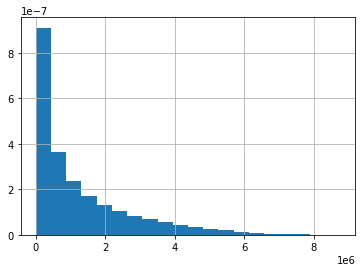

In [233]:
topspenders_df['CumulativeSum'].hist(bins=20 , density = True)

In [234]:
# Let's group customers in order for their contribution to cumulative total.

Total_revanue = topspenders_df.CumulativeSum.max()
percent = {'Low spender':,'Mid spender':50 , 'Top spender':100}

for number in percent:
    percent[number] = round(Total_revanue*percent[number]/100)
percent

{'Low spender': 2191271, 'Mid spender': 4382543, 'Top spender': 8765086}

In [235]:
listkeys =list(percent.keys())
listvalues = np.append(0,list(percent.values()))

topspenders_df['BuyingClass'] = pd.cut(topspenders_df['CumulativeSum'], bins=listvalues, labels=listkeys, right=False)

In [236]:
topspenders_df

,InvoiceNo,Quantity,UnitPrice,Value,Time,CumulativeSum,BuyingClass
CustomerID,,,,,,,
13256.0,578841,12540,0.00,0.00,15,0.00,Low spender
16738.0,543986,3,1.25,3.75,9,3.75,Low spender
16454.0,569915,2,2.95,5.90,16,9.65,Low spender
14792.0,1140006,2,6.20,6.20,18,15.85,Low spender
17956.0,548862,1,12.75,12.75,13,28.60,Low spender
...,...,...,...,...,...,...,...
14911.0,3195282211,80513,22811.38,140450.72,68128,7863266.97,Top spender
16446.0,1688629,80997,4.98,168472.50,27,8031739.47,Top spender
17450.0,188845149,69993,1143.32,194550.79,4140,8226290.26,Top spender


In [237]:
topspenders_df.groupby(by = 'BuyingClass').count().Value*100/topspenders_df['Value'].count()

BuyingClass
Low spender    79.542831
Mid spender    15.562226
Top spender     4.894943
Name: Value, dtype: float64

In [238]:
topspenders_df.groupby(by = 'BuyingClass').sum().Value*100/topspenders_df['Value'].sum()

BuyingClass
Low spender    24.998335
Mid spender    24.949545
Top spender    50.052119
Name: Value, dtype: float64

# Customer segmentation according to the frequency of purchase

In [239]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Date,Time,Weekday,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01,8,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01,8,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday,December


In [240]:
topspenders_df['Frequency'] = customer_df.groupby('CustomerID')['Date'].unique().str.len()

In [241]:
topspenders_df

,InvoiceNo,Quantity,UnitPrice,Value,Time,CumulativeSum,BuyingClass,Frequency
CustomerID,,,,,,,,
13256.0,578841,12540,0.00,0.00,15,0.00,Low spender,1
16738.0,543986,3,1.25,3.75,9,3.75,Low spender,1
16454.0,569915,2,2.95,5.90,16,9.65,Low spender,1
14792.0,1140006,2,6.20,6.20,18,15.85,Low spender,1
17956.0,548862,1,12.75,12.75,13,28.60,Low spender,1
...,...,...,...,...,...,...,...,...
14911.0,3195282211,80513,22811.38,140450.72,68128,7863266.97,Top spender,131
16446.0,1688629,80997,4.98,168472.50,27,8031739.47,Top spender,2
17450.0,188845149,69993,1143.32,194550.79,4140,8226290.26,Top spender,27


<AxesSubplot:>

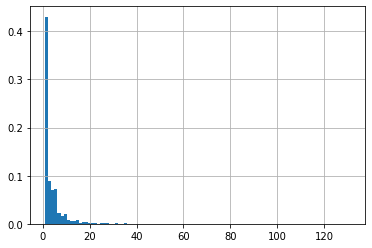

In [245]:
topspenders_df = topspenders_df.sort_values(by='Frequency')
topspenders_df['Frequency'].hist(bins =100 ,density = True)

In [251]:
topspenders_df['CumulativeFreq'] = topspenders_df.Frequency.cumsum()
topspenders_df

,InvoiceNo,Quantity,UnitPrice,Value,Time,CumulativeSum,BuyingClass,Frequency,CumulativeFreq
CustomerID,,,,,,,,,
13256.0,578841,12540,0.00,0.00,15,0.00,Low spender,1,1
13106.0,561811,18,4.25,76.50,15,4896.31,Low spender,1,2
12968.0,2819285,73,16.45,135.95,75,31334.67,Low spender,1,3
12353.0,2215600,20,24.30,89.00,68,7176.33,Low spender,1,4
15083.0,2739535,38,33.35,88.20,60,7087.33,Low spender,1,5
...,...,...,...,...,...,...,...,...,...
14606.0,1500236047,6214,7550.75,12006.65,34399,5469242.82,Top spender,88,16228
15311.0,1323212209,38194,5961.86,60767.90,30570,7108050.84,Top spender,90,16318
17841.0,4413545179,23053,19834.29,40967.72,103713,6577771.97,Top spender,112,16430


In [255]:
# Let's group customers in order for their contribution to cumulative total.

Total_revanue = topspenders_df.CumulativeFreq.max()
percent = {'Low Frequency':12 ,'Mid Frequency':52 , 'High Frequency':132}

In [256]:
listkeys =list(percent.keys())
listvalues = np.append(0,list(percent.values()))

topspenders_df['FrequencyClass'] = pd.cut(topspenders_df['Frequency'], bins=listvalues, labels=listkeys, right=False)

In [257]:
topspenders_df

,InvoiceNo,Quantity,UnitPrice,Value,Time,CumulativeSum,BuyingClass,Frequency,CumulativeFreq,FrequencyClass
CustomerID,,,,,,,,,,
13256.0,578841,12540,0.00,0.00,15,0.00,Low spender,1,1,Low Frequency
13106.0,561811,18,4.25,76.50,15,4896.31,Low spender,1,2,Low Frequency
12968.0,2819285,73,16.45,135.95,75,31334.67,Low spender,1,3,Low Frequency
12353.0,2215600,20,24.30,89.00,68,7176.33,Low spender,1,4,Low Frequency
15083.0,2739535,38,33.35,88.20,60,7087.33,Low spender,1,5,Low Frequency
...,...,...,...,...,...,...,...,...,...,...
14606.0,1500236047,6214,7550.75,12006.65,34399,5469242.82,Top spender,88,16228,High Frequency
15311.0,1323212209,38194,5961.86,60767.90,30570,7108050.84,Top spender,90,16318,High Frequency
17841.0,4413545179,23053,19834.29,40967.72,103713,6577771.97,Top spender,112,16430,High Frequency


In [ ]:
pd.to_csv('Grouped and categorized customer.csv',index=False)